In [37]:
import pandas as pd

df = pd.read_csv('/content/absenteeism.csv')
df.head()

,ethnicity,sex,age,learner_status,days_absent
0,A,M,F0,SL,2
1,A,M,F0,SL,11
2,A,M,F0,SL,14
3,A,M,F0,AL,5
4,A,M,F0,AL,5


In [38]:
df = df.drop_duplicates()

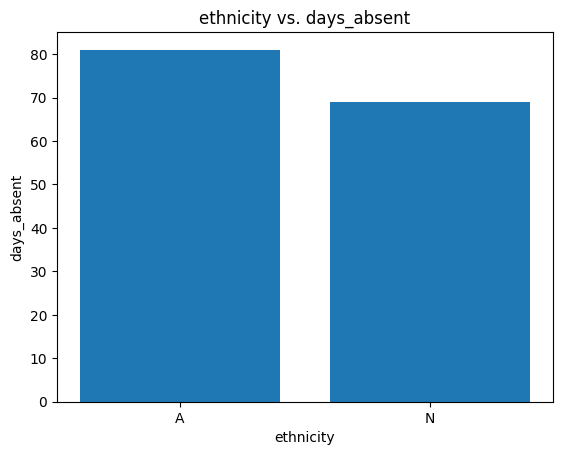

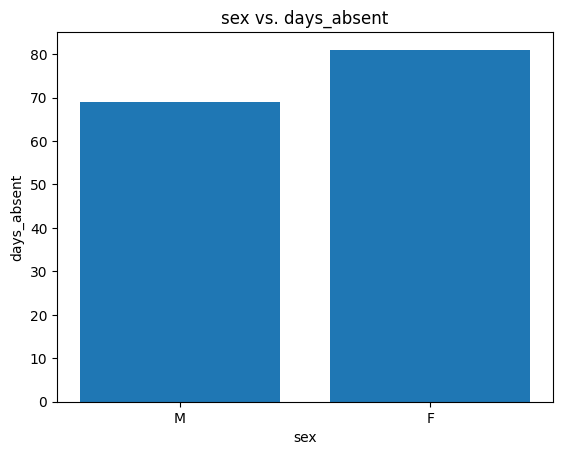

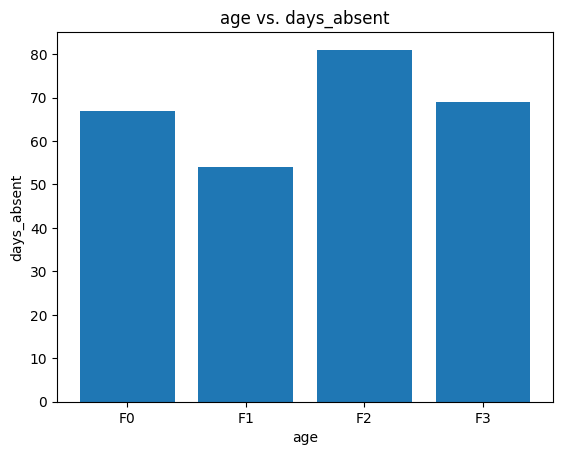

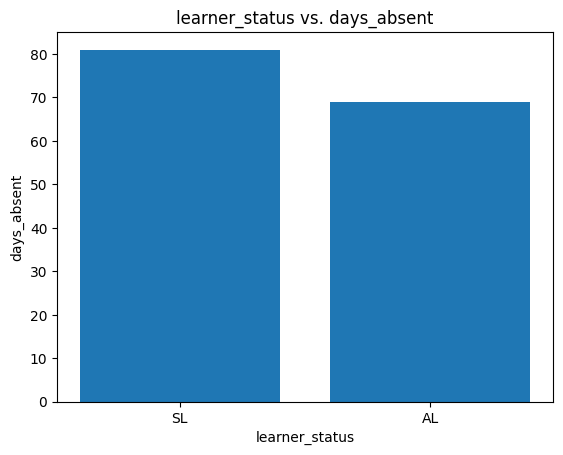

In [39]:
import matplotlib.pyplot as plt

def plot(df, target_column):
  for column in df.columns:
    if column != target_column:
      plt.figure()
      plt.bar(df[column], df[target_column])
      plt.xlabel(column)
      plt.ylabel(target_column)
      plt.title(f"{column} vs. {target_column}")
      plt.show()

plot(df, 'days_absent')

In [15]:
dummies_features = ['ethnicity', 'sex', 'age', 'learner_status']

df_new = pd.get_dummies(df,columns = dummies_features)

In [16]:
df_new.head(3)

,days_absent,ethnicity_A,ethnicity_N,sex_F,sex_M,age_F0,age_F1,age_F2,age_F3,learner_status_AL,learner_status_SL
0,2,True,False,False,True,True,False,False,False,False,True
1,11,True,False,False,True,True,False,False,False,False,True
2,14,True,False,False,True,True,False,False,False,False,True


In [17]:
df_new = df_new.astype(int)

In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 0 to 145
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   days_absent        127 non-null    int64
 1   ethnicity_A        127 non-null    int64
 2   ethnicity_N        127 non-null    int64
 3   sex_F              127 non-null    int64
 4   sex_M              127 non-null    int64
 5   age_F0             127 non-null    int64
 6   age_F1             127 non-null    int64
 7   age_F2             127 non-null    int64
 8   age_F3             127 non-null    int64
 9   learner_status_AL  127 non-null    int64
 10  learner_status_SL  127 non-null    int64
dtypes: int64(11)
memory usage: 11.9 KB


In [24]:
from sklearn.model_selection import train_test_split

x = df_new.drop('days_absent', axis=1)
y = df_new['days_absent']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
model = tf.keras.Sequential([
    layers.Dense(units=1)
])

In [40]:
loss = tf.losses.MeanAbsoluteError()
optimizer = tf.optimizers.Adam(learning_rate=0.01)

In [41]:
model.compile(optimizer = optimizer,loss = loss)
fitting = model.fit(x_train,y_train,epochs = 10,batch_size = 32,validation_split = 0.2)
model.evaluate(x_test,y_test)

Epoch 1/10
3/3 [==============================] - 0s 80ms/step - loss: 14.9516 - val_loss: 21.1515
Epoch 2/10
3/3 [==============================] - 0s 16ms/step - loss: 14.8224 - val_loss: 21.0626
Epoch 3/10
3/3 [==============================] - 0s 16ms/step - loss: 14.6945 - val_loss: 20.9713
Epoch 4/10
3/3 [==============================] - 0s 17ms/step - loss: 14.5650 - val_loss: 20.8802
Epoch 5/10
3/3 [==============================] - 0s 17ms/step - loss: 14.4453 - val_loss: 20.7985
Epoch 6/10
3/3 [==============================] - 0s 16ms/step - loss: 14.3241 - val_loss: 20.7240
Epoch 7/10
3/3 [==============================] - 0s 16ms/step - loss: 14.2140 - val_loss: 20.6524
Epoch 8/10
3/3 [==============================] - 0s 16ms/step - loss: 14.1074 - val_loss: 20.5863
Epoch 9/10
3/3 [==============================] - 0s 18ms/step - loss: 14.0150 - val_loss: 20.5201
Epoch 10/10
2/2 [==============================] - 0s 7ms/step - loss: 16.9370


16.936960220336914